In [1]:
import SciServer.CasJobs as CasJobs # query with CasJobs
import SciServer.SciDrive           # read/write to/from SciDrive

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mplpyplot
%matplotlib inline

In [3]:
import skimage.io                   # image processing library
import urllib                       # accessing resources thorugh remote URLs
import json                         # work with JSON files

In [4]:
from pymongo import MongoClient
from bson.son import SON

In [5]:
import astropy.io.fits as astrofits
from astropy.table import Table

In [6]:
verbose = True
if verbose :
    from IPython.display import display, HTML
    import pprint
    prettyPrinter = pprint.PrettyPrinter(indent=4)

### Retrieve data about FERENGI Galaxies from Zooniverse Mongo Database

In [7]:
clientInstance = MongoClient()
database = clientInstance['test']
gzClassifications = database['galaxy_zoo_classifications']
gzSubjects = database['galaxy_zoo_subjects']
gzGroups = database['galaxy_zoo_groups']

In [8]:
galaxyPropertiesFerengi = gzSubjects.find({"metadata.survey": "ferengi"}, {"metadata.sdss_id" : 1, "metadata.survey": 1})

In [9]:
galaxyPropertiesFerengi.rewind()
galaxyPropertiesFerengiFrame = pd.DataFrame([{ 'sdss_id' : found['metadata']['sdss_id'], 'survey' : found['metadata']['survey'] } for found in galaxyPropertiesFerengi])

In [10]:
galaxyPropertiesFerengiFrameGrouped = galaxyPropertiesFerengiFrame.groupby('sdss_id', as_index=False).first()
if verbose :
    display(galaxyPropertiesFerengiFrameGrouped)

,sdss_id,survey
0,587725041707647104,ferengi
1,587725503408111766,ferengi
2,587725816945639430,ferengi
3,587725994110812271,ferengi
4,587726015071584436,ferengi
5,587726031695970407,ferengi
6,587726031726051344,ferengi
7,587726032261742732,ferengi
8,587726033331945615,ferengi
9,587727944033304748,ferengi


In [11]:
ferengiIDsString = "(" + ",".join(galaxyPropertiesFerengiFrameGrouped["sdss_id"]) + ")"

In [12]:
if verbose :
    display(ferengiIDsString)

'(587725041707647104,587725503408111766,587725816945639430,587725994110812271,587726015071584436,587726031695970407,587726031726051344,587726032261742732,587726033331945615,587727944033304748,587728309103427790,587728669880418319,587728677395759224,587728880332308694,587729158430588988,587729231446999522,587729387682660525,587729773684195496,587729774758133903,587729777978769608,587729778512756840,587731186742722713,587731187282477155,587731499719786522,587731511532453917,587731511542415463,587731512079220798,587731513685573788,587731521201766677,587731680122503257,587731868555608115,587731868558557253,587731887348514923,587731887348908142,587732048407625763,587732050550915280,587732135918698562,587732153103548455,587732156850438318,587732482197094615,587732482216820783,587732482737832062,587732483813146687,587732483813277735,587732483823894547,587732484357095469,587732582053576732,587732583128236144,587732590103822500,587732591177695368,587732701257138315,587732772132356130,5877330802

### Query CasJobs API to get information about Ferengi Galaxies

In [13]:
ferengiQuery = """SELECT s.objID,
s.ra, s.dec, g.petror90_r,
s.z as redshift, 
s.zErr as redshiftError, 
s.zWarning as redshiftWarning,
s.run,
s.rerun,
s.camcol,
s.field,
s.obj,
s.type 
FROM SpecPhoto AS s
JOIN Galaxy AS g 
ON s.objID = g.objID
WHERE
s.objID IN """ + ferengiIDsString

In [14]:
if verbose :
    prettyPrinter.pprint(ferengiQuery)

('SELECT s.objID,\n'
 's.ra, s.dec, g.petror90_r,\n'
 's.z as redshift, \n'
 's.zErr as redshiftError, \n'
 's.zWarning as redshiftWarning,\n'
 's.run,\n'
 's.rerun,\n'
 's.camcol,\n'
 's.field,\n'
 's.obj,\n'
 's.type \n'
 'FROM SpecPhoto AS s\n'
 'JOIN Galaxy AS g \n'
 'ON s.objID = g.objID\n'
 'WHERE\n'
 's.objID IN '
 '(587725041707647104,587725503408111766,587725816945639430,587725994110812271,587726015071584436,587726031695970407,587726031726051344,587726032261742732,587726033331945615,587727944033304748,587728309103427790,587728669880418319,587728677395759224,587728880332308694,587729158430588988,587729231446999522,587729387682660525,587729773684195496,587729774758133903,587729777978769608,587729778512756840,587731186742722713,587731187282477155,587731499719786522,587731511532453917,587731511542415463,587731512079220798,587731513685573788,587731521201766677,587731680122503257,587731868555608115,587731868558557253,587731887348514923,587731887348908142,587732048407625763,587732050

In [15]:
authToken = 'bdf928d4c64846cbac9b9af2f8258c3a'
import SciServer.LoginPortal
userManager = SciServer.LoginPortal.getKeystoneUserWithToken(authToken)

In [16]:
userManager.userName

'hughdickinson'

In [17]:
ferengiResponse = CasJobs.executeQuery(ferengiQuery, "dr7",token=authToken)

In [18]:
if verbose :
    prettyPrinter.pprint(ferengiResponse.getvalue())

('objID,ra,dec,petror90_r,redshift,redshiftError,redshiftWarning,run,rerun,camcol,field,obj,type\n'
 '587725041707647104,191.75422,-1.5780896,27.32619,0.00906325,0.000205485,0,1231,40,6,150,128,3\n'
 '587725503408111766,253.01522,63.115797,14.4512,0.010397,9.29122E-05,0,1339,40,2,20,150,3\n'
 '587725816945639430,158.3451,64.501628,24.20067,0.010781,0.000164293,0,1412,40,2,95,6,3\n'
 '587725994110812271,250.27736,46.004065,13.06121,0.01781,0.000198776,0,1453,40,4,61,111,3\n'
 '587726015071584436,186.05608,2.394698,10.17622,0.0261418,8.01694E-05,65536,1458,40,3,409,180,3\n'
 '587726031695970407,144.14736,1.1166195,14.82541,0.0164446,0.000112112,0,1462,40,2,125,103,3\n'
 '587726031726051344,212.79203,1.4747226,9.616467,0.025506,0.000185515,0,1462,40,2,584,16,3\n'
 '587726032261742732,210.1908,2.0219894,27.36171,0.0121429,0.00019027,0,1462,40,3,566,140,3\n'
 '587726033331945615,202.06737,2.9826406,24.43585,0.0211328,0.00010119,0,1462,40,5,512,143,3\n'
 '587727944033304748,148.54452,2.28719

In [19]:
if len(ferengiResponse.getvalue().strip()) > 0 :
    ferengiResponse.seek(0)
    ferengiResultFrame = pd.read_csv(ferengiResponse, index_col='objID')
else :
    print ("No results were returned")

In [20]:
if verbose :
    display(ferengiResultFrame)

,ra,dec,petror90_r,redshift,redshiftError,redshiftWarning,run,rerun,camcol,field,obj,type
objID,,,,,,,,,,,,
587725041707647104,191.754220,-1.578090,27.326190,0.009063,0.000205,0,1231,40,6,150,128,3
587725503408111766,253.015220,63.115797,14.451200,0.010397,0.000093,0,1339,40,2,20,150,3
587725816945639430,158.345100,64.501628,24.200670,0.010781,0.000164,0,1412,40,2,95,6,3
587725994110812271,250.277360,46.004065,13.061210,0.017810,0.000199,0,1453,40,4,61,111,3
587726015071584436,186.056080,2.394698,10.176220,0.026142,0.000080,65536,1458,40,3,409,180,3
587726031695970407,144.147360,1.116619,14.825410,0.016445,0.000112,0,1462,40,2,125,103,3
587726031726051344,212.792030,1.474723,9.616467,0.025506,0.000186,0,1462,40,2,584,16,3
587726032261742732,210.190800,2.021989,27.361710,0.012143,0.000190,0,1462,40,3,566,140,3
587726033331945615,202.067370,2.982641,24.435850,0.021133,0.000101,0,1462,40,5,512,143,3


### Just for fun plot a random sampling of the FERENGI galaxy sample

In [21]:
width=500
height=500
pixelsize=0.396 # SDSS pixel scale?

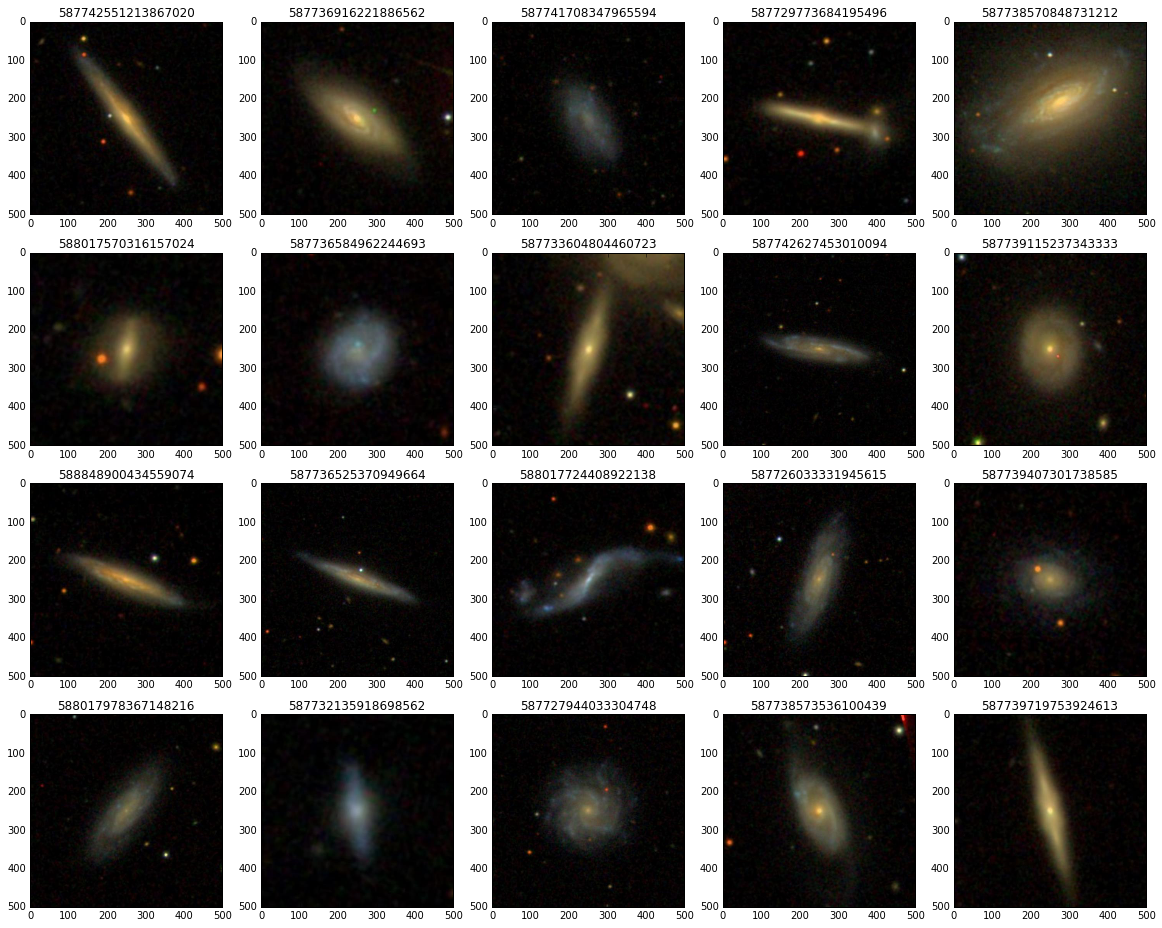

In [22]:
# figures do not persist between cells!
mplpyplot.figure(figsize=(20, 20))
subPlotNum = 1

for index,galData in ferengiResultFrame.sample(20).iterrows():
    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=2.0*galData['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(galData['ra'])
    cutOutImageUrl += "&dec=" + str(galData['dec']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)
    # retrieve 
    cutoutImage=skimage.io.imread(cutOutImageUrl)
    mplpyplot.subplot(5,5,subPlotNum)
    subPlotNum += 1
    mplpyplot.imshow(cutoutImage)
    # show the object identifier (objId) above the image.
    mplpyplot.title(index)

### Now attempt to retireve the corresponding DR12 `ObjId`s for the FERENGI Galaxies based on celestial coordinates

In [23]:
# compose LARGE union query to assemble a stuctire of literal RA and Dec values that can be used as function arguments
ferengiRADecUnion = " UNION ALL ".join(([ "(SELECT " + " , ".join([str(galData['ra'])+ " AS targetRA " , 
                        str(galData['dec']) + " AS targetDec"]) + ")" for index, galData in ferengiResultFrame.iterrows() ]))

if verbose :
    prettyPrinter.pprint(ferengiRADecUnion)

('(SELECT 191.75422 AS targetRA  , -1.5780896 AS targetDec) UNION ALL (SELECT '
 '253.01522 AS targetRA  , 63.115797 AS targetDec) UNION ALL (SELECT 158.3451 '
 'AS targetRA  , 64.501628 AS targetDec) UNION ALL (SELECT 250.27736 AS '
 'targetRA  , 46.004065 AS targetDec) UNION ALL (SELECT 186.05608 AS targetRA  '
 ', 2.394698 AS targetDec) UNION ALL (SELECT 144.14736 AS targetRA  , '
 '1.1166195 AS targetDec) UNION ALL (SELECT 212.79203 AS targetRA  , 1.4747226 '
 'AS targetDec) UNION ALL (SELECT 210.1908 AS targetRA  , 2.0219894 AS '
 'targetDec) UNION ALL (SELECT 202.06737 AS targetRA  , 2.9826406 AS '
 'targetDec) UNION ALL (SELECT 148.54452 AS targetRA  , 2.287193 AS targetDec) '
 'UNION ALL (SELECT 170.9985 AS targetRA  , 2.691881 AS targetDec) UNION ALL '
 '(SELECT 124.08283 AS targetRA  , 43.447637 AS targetDec) UNION ALL (SELECT '
 '192.27536 AS targetRA  , 64.132142 AS targetDec) UNION ALL (SELECT 135.9163 '
 'AS targetRA  , 3.369799 AS targetDec) UNION ALL (SELECT 197.12341 A

In [24]:
ferengiDR12Query = """SELECT ra, 
dec, 
z as redShift,
zErr as redshiftUncertainty,
zWarning as redShiftWarning,
dbo.fSpecZWarningN(zWarning) as redShiftWarningText,
targetRA, 
targetDec, 
(ra - targetRA) AS raOffset, 
(dec - targetDec) AS decOffset, 
dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3) as nearestObjectId 
FROM 
(""" + ferengiRADecUnion + """) AS ferengiRASAndDecs 
JOIN SpecPhoto 
ON objid = dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3)"""

In [25]:
if verbose :
    prettyPrinter.pprint(ferengiDR12Query)

('SELECT ra, \n'
 'dec, \n'
 'z as redShift,\n'
 'zErr as redshiftUncertainty,\n'
 'zWarning as redShiftWarning,\n'
 'dbo.fSpecZWarningN(zWarning) as redShiftWarningText,\n'
 'targetRA, \n'
 'targetDec, \n'
 '(ra - targetRA) AS raOffset, \n'
 '(dec - targetDec) AS decOffset, \n'
 'dbo.fGetNearestObjIdEqType(targetRA, targetDec,3.0, 3) as nearestObjectId \n'
 'FROM \n'
 '((SELECT 191.75422 AS targetRA  , -1.5780896 AS targetDec) UNION ALL (SELECT '
 '253.01522 AS targetRA  , 63.115797 AS targetDec) UNION ALL (SELECT 158.3451 '
 'AS targetRA  , 64.501628 AS targetDec) UNION ALL (SELECT 250.27736 AS '
 'targetRA  , 46.004065 AS targetDec) UNION ALL (SELECT 186.05608 AS targetRA  '
 ', 2.394698 AS targetDec) UNION ALL (SELECT 144.14736 AS targetRA  , '
 '1.1166195 AS targetDec) UNION ALL (SELECT 212.79203 AS targetRA  , 1.4747226 '
 'AS targetDec) UNION ALL (SELECT 210.1908 AS targetRA  , 2.0219894 AS '
 'targetDec) UNION ALL (SELECT 202.06737 AS targetRA  , 2.9826406 AS '
 'targetDec) UNI

In [26]:
ferengiDR12Response = CasJobs.executeQuery(ferengiDR12Query, "dr12",token=authToken)

In [27]:
if verbose :
    prettyPrinter.pprint(ferengiDR12Response.getvalue())

('ra,dec,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,targetRA,targetDec,raOffset,decOffset,nearestObjectId\n'
 '145.80019,0.41417226,0.02524959,1.459553E-05,0,"OK",145.8001900,0.41417226,0,0,1237648721752621257\n'
 '171.07768,0.64372568,0.0263642,9.731633E-06,0,"OK",171.0776800,0.64372568,0,0,1237648722300567644\n'
 '14.925516,0.9166085,0.01763613,1.682458E-05,0,"OK",14.9255160,0.91660850,0,0,1237663785277653149\n'
 '208.04814,13.999919,0.02444053,1.540784E-05,0,"OK",208.0481400,13.99991900,0,0,1237662530063499615\n'
 '4.4808229,0.33523211,0.01808284,1.301776E-05,0,"OK",4.4808229,0.33523211,0,0,1237657191444054059\n'
 '32.638163,0.73809987,0.01165467,8.550967E-06,0,"OK",32.6381630,0.73809987,0,0,1237657071698313314\n'
 '206.10218,20.409565,0.02698247,1.364538E-05,0,"OK",206.1021800,20.40956500,0,0,1237667781769625658\n'
 '17.659383,-0.27804543,0.01802551,8.922648E-06,0,"OK",17.6593830,-0.27804543,0,0,1237663783668220085\n'
 '209.73111,15.63577,0.02546789,7.174393E-

In [28]:
if len(ferengiDR12Response.getvalue().strip()) > 0 :
    ferengiDR12Response.seek(0)
    ferengiDR12ResultFrame = pd.read_csv(ferengiDR12Response, index_col='nearestObjectId')
else :
    print ("No results were returned")

In [29]:
if verbose :
    display(ferengiDR12ResultFrame)

,ra,dec,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,targetRA,targetDec,raOffset,decOffset
nearestObjectId,,,,,,,,,,
1237648721752621257,145.800190,0.414172,0.025250,0.000015,0,OK,145.800190,0.414172,0,0
1237648722300567644,171.077680,0.643726,0.026364,0.000010,0,OK,171.077680,0.643726,0,0
1237663785277653149,14.925516,0.916608,0.017636,0.000017,0,OK,14.925516,0.916609,0,0
1237662530063499615,208.048140,13.999919,0.024441,0.000015,0,OK,208.048140,13.999919,0,0
1237657191444054059,4.480823,0.335232,0.018083,0.000013,0,OK,4.480823,0.335232,0,0
1237657071698313314,32.638163,0.738100,0.011655,0.000009,0,OK,32.638163,0.738100,0,0
1237667781769625658,206.102180,20.409565,0.026982,0.000014,0,OK,206.102180,20.409565,0,0
1237663783668220085,17.659383,-0.278045,0.018026,0.000009,0,OK,17.659383,-0.278045,0,0
1237668349207445599,209.731110,15.635770,0.025468,0.000007,0,OK,209.731110,15.635770,0,0


### Plot the reshift distribution of the matched objects

Minimum redshift in original FERENGI sample is 0.003665871
Number of galaxies in original FERENGI sample is 281


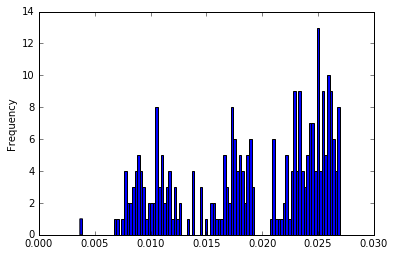

In [30]:
ferengiDR12ResultFrame["redShift"].plot.hist(bins=100)
print("Minimum redshift in original FERENGI sample is {0}".format(min(ferengiDR12ResultFrame['redShift'][ferengiDR12ResultFrame['redShiftWarning'] == 0])))
print("Number of galaxies in original FERENGI sample is {0}".format(len(ferengiDR12ResultFrame.index)))

### Find any mismatching coordinates

In [31]:
mismatchingCoordRows = ferengiDR12ResultFrame[(ferengiDR12ResultFrame['raOffset'] != 0) | (ferengiDR12ResultFrame['decOffset'] != 0) ]
if(len(mismatchingCoordRows.index) > 0) :
    display(mismatchingCoordRows)
else :
    print ('No mismatches found!')

No mismatches found!


### Find Galaxies with 0.001 < z < 0.013 in the original FERENGI dataset

In [32]:
redShiftMaximum = 0.013
redShiftMinimum = 0.001
zSelectedferengiDR12ResultFrame = ferengiDR12ResultFrame.where((ferengiDR12ResultFrame["redShift"] > redShiftMinimum) & (ferengiDR12ResultFrame["redShift"] < redShiftMaximum)).dropna()
if verbose :
    display(zSelectedferengiDR12ResultFrame)

,ra,dec,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,targetRA,targetDec,raOffset,decOffset
nearestObjectId,,,,,,,,,,
1237657071698313314,32.638163,0.738100,0.011655,0.000009,0.0,OK,32.638163,0.738100,0.0,0.0
1237662226225234033,214.826660,37.022623,0.009470,0.000016,0.0,OK,214.826660,37.022623,0.0,0.0
1237662225686069253,208.309310,38.227147,0.011696,0.000008,0.0,OK,208.309310,38.227147,0.0,0.0
1237651753486647426,210.190800,2.021989,0.011990,0.000011,0.0,OK,210.190800,2.021989,0.0,0.0
1237654601557213384,135.916300,3.369799,0.012394,0.000006,0.0,OK,135.916300,3.369799,0.0,0.0
1237661852003991657,177.551920,45.478677,0.010605,0.000010,0.0,OK,177.551920,45.478677,0.0,0.0
1237662306187149376,208.243250,39.718684,0.008808,0.000006,0.0,OK,208.243250,39.718684,0.0,0.0
1237658205582000162,173.234780,50.241849,0.009780,0.000008,0.0,OK,173.234780,50.241849,0.0,0.0
1237658205048799246,186.401570,50.336965,0.008256,0.000016,0.0,OK,186.401570,50.336965,0.0,0.0


### Find Galaxies with 0.001 < z < 0.013 in the SDSS DR12 dataset

In [33]:
galaxyTypeInt = 3  # could look up from table in principle
sdssDR12Query = """SELECT s.objID,
s.ra, 
s.dec,
s.type,
s.z as redShift,
s.zErr as redshiftUncertainty,
s.zWarning as redShiftWarning,
dbo.fSpecZWarningN(zWarning) as redShiftWarningText,
g.petror90_r
FROM SpecPhoto AS s
JOIN Galaxy AS g 
ON s.objID = g.objID
WHERE (s.type = """ + str(galaxyTypeInt) + " AND s.z < " + str(redShiftMaximum) + " AND s.z > " + str(redShiftMinimum) + " AND s.zWarning = 0)"

In [34]:
sdssDR12Response = CasJobs.executeQuery(sdssDR12Query, "dr12",token=authToken)

In [35]:
if verbose :
    # This should be a very long response so limit the output
    sdssDR12ResponseLines = sdssDR12Response.getvalue().split('\n')
    for iLine in range(50) :
        print (sdssDR12ResponseLines[iLine])
    print ('Plus {0} more rows...'.format(len(sdssDR12ResponseLines) - 50))

objID,ra,dec,type,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,petror90_r
1237648673971437623,189.52228,-0.027016383,3,0.01251297,1.123234E-05,0,"OK",21.94494
1237648673994637807,242.43318,-0.11512294,3,0.005018893,1.212132E-05,0,"OK",14.93833
1237648675068903947,243.6373,0.82163553,3,0.006617586,2.337325E-05,0,"OK",37.91467
1237648702969348436,190.01199,-1.0507696,3,0.005298289,9.554308E-06,0,"OK",1.424731
1237648702975180927,203.22969,-1.1594902,3,0.0126869,1.097585E-05,0,"OK",17.50345
1237648702977343535,208.22692,-1.11463,3,0.004585617,2.018317E-05,0,"OK",72.89983
1237648702979375194,212.90746,-1.1561632,3,0.005095313,1.067038E-05,0,"OK",68.6096
1237648702984683605,225.00545,-1.091117,3,0.006297647,5.120965E-06,0,"OK",15.02518
1237648703507660888,193.22164,-0.82259414,3,0.004755149,1.764526E-05,0,"OK",14.63838
1237648703508119858,194.27943,-0.8076305,3,0.009409807,1.051833E-05,0,"OK",10.27304
1237648703519326351,219.95832,-0.71816513,3,0.005896949,3.614047E-05,0

In [36]:
if len(sdssDR12Response.getvalue().strip()) > 0 :
    sdssDR12Response.seek(0)
    sdssDR12ResultFrame = pd.read_csv(sdssDR12Response, index_col='objID')
else :
    print ("No results were returned")

In [37]:
if verbose :
    display(sdssDR12ResultFrame)

,ra,dec,type,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,petror90_r
objID,,,,,,,,
1237648673971437623,189.522280,-0.027016,3,0.012513,1.123234e-05,0,OK,21.944940
1237648673994637807,242.433180,-0.115123,3,0.005019,1.212132e-05,0,OK,14.938330
1237648675068903947,243.637300,0.821636,3,0.006618,2.337325e-05,0,OK,37.914670
1237648702969348436,190.011990,-1.050770,3,0.005298,9.554308e-06,0,OK,1.424731
1237648702975180927,203.229690,-1.159490,3,0.012687,1.097585e-05,0,OK,17.503450
1237648702977343535,208.226920,-1.114630,3,0.004586,2.018317e-05,0,OK,72.899830
1237648702979375194,212.907460,-1.156163,3,0.005095,1.067038e-05,0,OK,68.609600
1237648702984683605,225.005450,-1.091117,3,0.006298,5.120965e-06,0,OK,15.025180
1237648703507660888,193.221640,-0.822594,3,0.004755,1.764526e-05,0,OK,14.638380


### Plot the redshift distribution of the selected sample

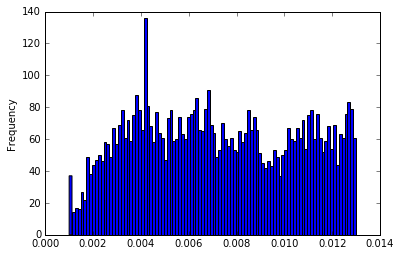

In [38]:
sdssDR12ResultFrame['redShift'][sdssDR12ResultFrame['redShiftWarning'] == 0].plot.hist(bins=100)

### Plot another random selection of images from the sample

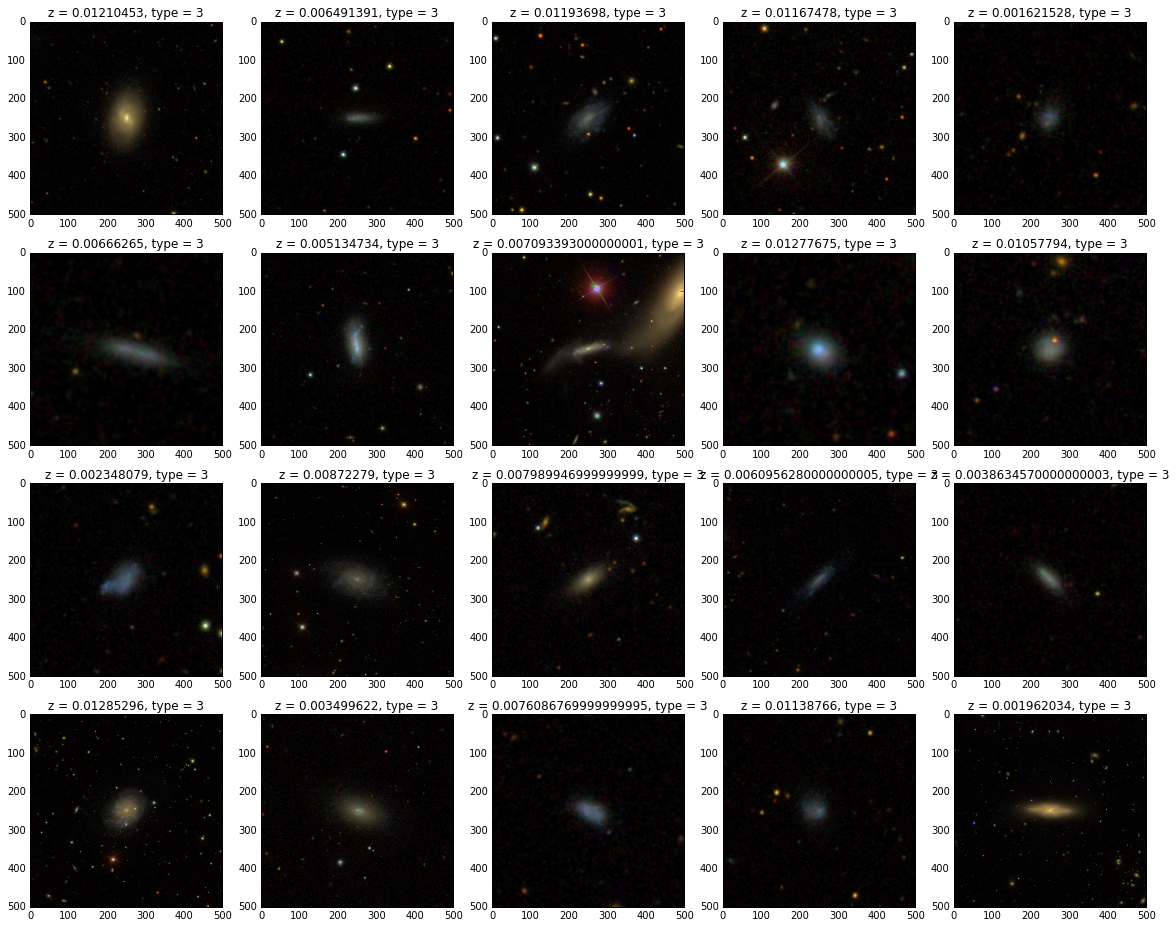

In [39]:
# figures do not persist between cells!
mplpyplot.figure(figsize=(20, 20))
subPlotNum = 1

for index,galData in sdssDR12ResultFrame.sample(20).iterrows():
    # the 'scale' parameter is set so that the image will be about 2x the size of the galaxy
    scale=4.0*galData['petror90_r']/pixelsize/width
    # form wurl to query SDSS web sevice to generate cutout image
    cutOutImageUrl="http://skyservice.pha.jhu.edu/DR12/ImgCutout/getjpeg.aspx?ra=" + str(galData['ra'])
    cutOutImageUrl += "&dec=" + str(galData['dec']) + "&scale=""" + str(scale) + "&width=" + str(width)
    cutOutImageUrl += "&height=" + str(height)
    # retrieve 
    cutoutImage=skimage.io.imread(cutOutImageUrl)
    mplpyplot.subplot(5,5,subPlotNum)
    subPlotNum += 1
    mplpyplot.imshow(cutoutImage)
    # show the object identifier (objId) above the image.
    mplpyplot.title("z = " + str(galData['redShift']) + ", type = " + str(galData['type']))

### Filter out any galaxies that were in the original FERENGI sample

In [40]:
originalFerengiSampleMatches = zSelectedferengiDR12ResultFrame.merge(sdssDR12ResultFrame, how='left', left_index=True, right_index=True, suffixes = ('_ferengi', '_sdss'))

In [41]:
if verbose :
    display(originalFerengiSampleMatches)

,ra_ferengi,dec_ferengi,redShift_ferengi,redshiftUncertainty_ferengi,redShiftWarning_ferengi,redShiftWarningText_ferengi,targetRA,targetDec,raOffset,decOffset,ra_sdss,dec_sdss,type,redShift_sdss,redshiftUncertainty_sdss,redShiftWarning_sdss,redShiftWarningText_sdss,petror90_r
1237651538170544242,158.345100,64.501628,0.010812,0.000020,0.0,OK,158.345100,64.501628,0.0,0.0,158.345100,64.501628,3.0,0.010812,0.000020,0.0,OK,24.221950
1237651753486647426,210.190800,2.021989,0.011990,0.000011,0.0,OK,210.190800,2.021989,0.0,0.0,210.190800,2.021989,3.0,0.011990,0.000011,0.0,OK,28.781350
1237654398620663929,192.275360,64.132142,0.007560,0.000005,0.0,OK,192.275360,64.132142,0.0,0.0,192.275360,64.132142,3.0,0.007560,0.000005,0.0,OK,10.802290
1237654601557213384,135.916300,3.369799,0.012394,0.000006,0.0,OK,135.916300,3.369799,0.0,0.0,135.916300,3.369799,3.0,0.012394,0.000006,0.0,OK,22.967320
1237657071698313314,32.638163,0.738100,0.011655,0.000009,0.0,OK,32.638163,0.738100,0.0,0.0,32.638163,0.738100,3.0,0.011655,0.000009,0.0,OK,15.336650
1237657589780512816,162.271000,52.335507,0.007889,0.000004,0.0,OK,162.271000,52.335507,0.0,0.0,162.271000,52.335507,3.0,0.007889,0.000004,0.0,OK,6.342457
1237657589783461929,173.084790,53.904568,0.009406,0.000008,0.0,OK,173.084790,53.904568,0.0,0.0,173.084790,53.904568,3.0,0.009406,0.000008,0.0,OK,22.015980
1237657857143603254,168.112140,51.636797,0.009448,0.000006,0.0,OK,168.112140,51.636797,0.0,0.0,168.112140,51.636797,3.0,0.009448,0.000006,0.0,OK,8.837173
1237657874328453165,139.139330,39.872792,0.008893,0.000010,0.0,OK,139.139330,39.872792,0.0,0.0,139.139330,39.872792,3.0,0.008893,0.000010,0.0,OK,30.621870
1237658203441725500,198.526990,48.156170,0.008426,0.000008,0.0,OK,198.526990,48.156170,0.0,0.0,198.526990,48.156170,3.0,0.008426,0.000008,0.0,OK,17.888510


### Display all rows in the original redshift-selected FERENGI sample that have no counterpart in the DR12 sample

In [42]:
numMissingMatches = len(zSelectedferengiDR12ResultFrame) - len(originalFerengiSampleMatches.dropna().index)
if len(originalFerengiSampleMatches.dropna().index) < len(zSelectedferengiDR12ResultFrame) :
    print ('{0} objects from the original Ferengi Sample are missing'.format(numMissingMatches))
    display(originalFerengiSampleMatches[originalFerengiSampleMatches['ra_sdss'].isnull()])
else :
    print ('The DR12 selection fully contains the original FERENGI data sample!')

1 objects from the original Ferengi Sample are missing


,ra_ferengi,dec_ferengi,redShift_ferengi,redshiftUncertainty_ferengi,redShiftWarning_ferengi,redShiftWarningText_ferengi,targetRA,targetDec,raOffset,decOffset,ra_sdss,dec_sdss,type,redShift_sdss,redshiftUncertainty_sdss,redShiftWarning_sdss,redShiftWarningText_sdss,petror90_r
1237662306723823671,207.85573,40.213272,0.008235,0.00001,16.0,MANY_OUTLIERS,207.85573,40.213272,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Note that this row has a non-zero redshift warning in DR12 and was therefore intentionally and correctly excluded.**

### Filter rows from the DR12 sample that correspond to the original FERENGI dataset

In [43]:
filteredSdssDR12ResultFrame = sdssDR12ResultFrame[~sdssDR12ResultFrame.index.isin(ferengiDR12ResultFrame.index)]

In [44]:
if verbose :
    display(filteredSdssDR12ResultFrame)

,ra,dec,type,redShift,redshiftUncertainty,redShiftWarning,redShiftWarningText,petror90_r
objID,,,,,,,,
1237648673971437623,189.522280,-0.027016,3,0.012513,1.123234e-05,0,OK,21.944940
1237648673994637807,242.433180,-0.115123,3,0.005019,1.212132e-05,0,OK,14.938330
1237648675068903947,243.637300,0.821636,3,0.006618,2.337325e-05,0,OK,37.914670
1237648702969348436,190.011990,-1.050770,3,0.005298,9.554308e-06,0,OK,1.424731
1237648702975180927,203.229690,-1.159490,3,0.012687,1.097585e-05,0,OK,17.503450
1237648702977343535,208.226920,-1.114630,3,0.004586,2.018317e-05,0,OK,72.899830
1237648702979375194,212.907460,-1.156163,3,0.005095,1.067038e-05,0,OK,68.609600
1237648702984683605,225.005450,-1.091117,3,0.006298,5.120965e-06,0,OK,15.025180
1237648703507660888,193.221640,-0.822594,3,0.004755,1.764526e-05,0,OK,14.638380


### We found 6032 potential galaxies!